# Evaluation of WBGAPI - Python client for World Bank Open Data API

In [1]:
import wbgapi as wb

### _Carbon emission indicators avialable via WDI database_

In [15]:
wb.db=2
wb.series.info(q='co2')

id,value
EN.ATM.CO2E.EG.ZS,CO2 intensity (kg per kg of oil equivalent energy use)
EN.ATM.CO2E.GF.KT,CO2 emissions from gaseous fuel consumption (kt)
EN.ATM.CO2E.GF.ZS,CO2 emissions from gaseous fuel consumption (% of total)
EN.ATM.CO2E.KD.GD,CO2 emissions (kg per 2015 US$ of GDP)
EN.ATM.CO2E.KT,CO2 emissions (kt)
EN.ATM.CO2E.LF.KT,CO2 emissions from liquid fuel consumption (kt)
EN.ATM.CO2E.LF.ZS,CO2 emissions from liquid fuel consumption (% of total)
EN.ATM.CO2E.PC,CO2 emissions (metric tons per capita)
EN.ATM.CO2E.PP.GD,CO2 emissions (kg per PPP $ of GDP)
EN.ATM.CO2E.PP.GD.KD,CO2 emissions (kg per 2017 PPP $ of GDP)


In [28]:
df_info = pd.DataFrame( wb.series.info([ 'EN.ATM.GHGT.KT.CE'] ).items )
df_info

,id,value
0,EN.ATM.GHGT.KT.CE,Total greenhouse gas emissions (kt of CO2 equi...


### _Retrieve and visualise top 10 GHG emitters_

In [33]:
# retrieve greenhouse gas emissions from 2000 - 2018
df = wb.data.DataFrame(['EN.ATM.CO2E.KT'], wb.region.members('WLD'), range(2000, 2019) )
df

,YR2000,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,YR2009,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018
economy,,,,,,,,,,,,,,,,,,,
ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFG,770.0,810.0,1100.0,1350.0,1130.0,1640.0,1940.0,2360.0,4390.0,6000.0,8670.0,12260.0,10450.0,8510.0,7810.0,7990.0,7390.0,7380.0,7440.0
AGO,12370.0,12910.0,13620.0,18010.0,19290.0,18210.0,20340.0,23490.0,25080.0,27150.0,28530.0,29460.0,30250.0,32820.0,34630.0,35160.0,35410.0,30840.0,27340.0
ALB,3170.0,3220.0,3750.0,4110.0,4290.0,4070.0,4050.0,4220.0,4170.0,4320.0,4580.0,5040.0,4580.0,4790.0,5220.0,5070.0,4930.0,5600.0,5560.0
AND,520.0,520.0,530.0,530.0,560.0,580.0,550.0,540.0,540.0,520.0,520.0,490.0,490.0,480.0,460.0,470.0,470.0,470.0,460.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEM,13890.0,15080.0,15140.0,17400.0,18400.0,19380.0,19410.0,20630.0,22010.0,25650.0,23990.0,20690.0,19680.0,26350.0,26710.0,14210.0,10880.0,10060.0,9310.0
ZAF,284730.0,320600.0,331420.0,353110.0,379970.0,377640.0,379560.0,396900.0,426560.0,404020.0,425110.0,409120.0,426710.0,436870.0,447980.0,424880.0,425180.0,435140.0,433250.0


<AxesSubplot:title={'center':'Total greenhouse gas emissions (kt of CO2 equivalent)'}>

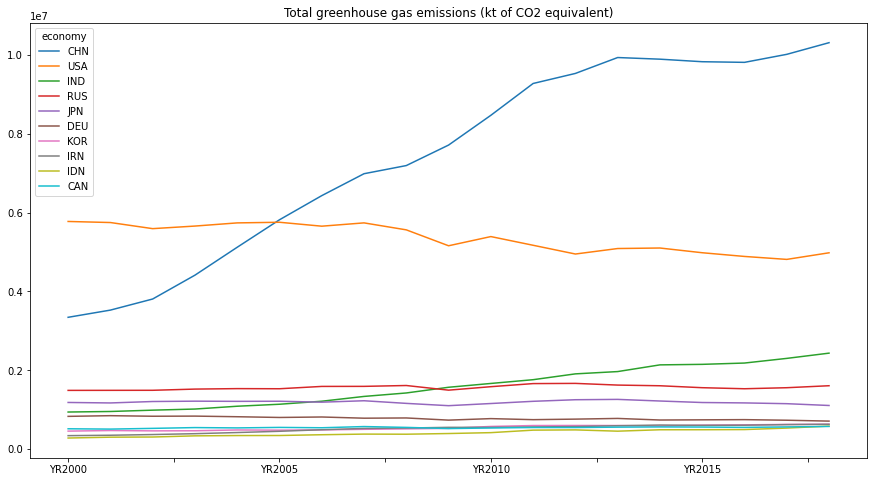

In [35]:
# extract 10 highest emitters of greenhouse gases
title = df_info [ df_info[ 'id' ] == 'EN.ATM.GHGT.KT.CE' ][ 'value' ].values[ 0 ]
g10 = df.sort_values(by=['YR2018'],ascending=False)[:10]
g10.T.plot(figsize=(15,8), title=title)

In [43]:
# indicators relevant to fossil fuel usage
wb.search('fossil fuels')

ID,Name,Field,Value
EG.ELC.COAL.KH,Electricity production from coal sources (kWh),Developmentrelevance,...from fossil fuel combustion and cement manufacturing. In combustion different fossil fuels release different amounts of carbon dioxide for the same level of energy use:...
EG.ELC.COAL.ZS,Electricity production from coal sources (% of total),Developmentrelevance,...from fossil fuel combustion and cement manufacturing. In combustion different fossil fuels release different amounts of carbon dioxide for the same level of energy use:...
EG.ELC.HYRO.KH,Electricity production from hydroelectric sources (kWh),Developmentrelevance,...from fossil fuel combustion and cement manufacturing. In combustion different fossil fuels release different amounts of carbon dioxide for the same level of energy use:...
EG.ELC.HYRO.ZS,Electricity production from hydroelectric sources (% of total),Developmentrelevance,...from fossil fuel combustion and cement manufacturing. In combustion different fossil fuels release different amounts of carbon dioxide for the same level of energy use:...
EG.ELC.NGAS.KH,Electricity production from natural gas sources (kWh),Developmentrelevance,...2) lower carbon relative to other fossil fuels;...
EG.ELC.NGAS.ZS,Electricity production from natural gas sources (% of total),Developmentrelevance,...2) lower carbon relative to other fossil fuels;...
EG.ELC.NUCL.KH,Electricity production from nuclear sources (kWh),Developmentrelevance,"...grew rapidly in the 1970s and 1980s as countries sought to reduce dependence on fossil fuels, especially after the oil crises of the 1970s. There was a renewed interest in..."
EG.ELC.NUCL.ZS,Electricity production from nuclear sources (% of total),Developmentrelevance,"...grew rapidly in the 1970s and 1980s as countries sought to reduce dependence on fossil fuels, especially after the oil crises of the 1970s. There was a renewed interest in..."
EG.ELC.PETR.KH,Electricity production from oil sources (kWh),Developmentrelevance,...from fossil fuel combustion and cement manufacturing. In combustion different fossil fuels release different amounts of carbon dioxide for the same level of energy use:...
EG.ELC.PETR.ZS,Electricity production from oil sources (% of total),Developmentrelevance,...from fossil fuel combustion and cement manufacturing. In combustion different fossil fuels release different amounts of carbon dioxide for the same level of energy use:...


### _Retrieve and visualise electricity production relative to source across North America_

In [71]:
ids = [ 'EG.ELC.COAL.ZS', 'EG.ELC.NGAS.ZS', 'EG.ELC.NUCL.ZS', 'EG.ELC.PETR.ZS', 'EG.ELC.RNEW.ZS' ]
df_info = pd.DataFrame( wb.series.info( ids ).items )
df_info

,id,value
0,EG.ELC.COAL.ZS,Electricity production from coal sources (% of...
1,EG.ELC.NGAS.ZS,Electricity production from natural gas source...
2,EG.ELC.NUCL.ZS,Electricity production from nuclear sources (%...
3,EG.ELC.PETR.ZS,Electricity production from oil sources (% of ...
4,EG.ELC.RNEW.ZS,Renewable electricity output (% of total elect...


In [72]:
df = wb.data.DataFrame( ids, [ 'CAN', 'USA', 'MEX' ], range(2000, 2015) )
df

YR2000     YR2001     YR2002     YR2003     YR2004  \
economy series                                                                  
CAN     EG.ELC.COAL.ZS  19.416905  19.988979  19.601669  19.105000  16.879798   
        EG.ELC.NGAS.ZS   5.527117   6.100749   5.628304   5.606047   5.727622   
        EG.ELC.NUCL.ZS  12.021050  13.004001  12.563419  12.703421  15.067890   
        EG.ELC.PETR.ZS   1.829768   2.864458   2.311206   3.660808   3.869371   
        EG.ELC.RNEW.ZS  60.600301  58.032656  59.886419  58.915565  58.446317   
MEX     EG.ELC.COAL.ZS   9.234958  10.794063  11.925983  12.936834  10.000716   
        EG.ELC.NGAS.ZS  21.455695  26.020151  34.166739  40.143173  42.792624   
        EG.ELC.NUCL.ZS   3.997083   4.077799   4.466573   4.445912   3.869805   
        EG.ELC.PETR.ZS  45.508205  42.002355  34.384867  30.348366  28.888431   
        EG.ELC.RNEW.ZS  19.804060  17.105632  15.055838  12.125715  14.448424   
USA     EG.ELC.COAL.ZS  52.895152  51.633427  50.657299  51.381168  50.396690   
        EG.ELC.NGAS.ZS  15.755294  17.190494  17.694024  16.528977  17.635918   
        EG.ELC.NUCL.ZS  19.814724  20.647015  19.981105  19.429993  19.607602   
        EG.ELC.PETR.ZS   2.943005   3.374908   2.636053   3.379207   3.353093   
        EG.ELC.RNEW.ZS   8.205997   6.783992   8.646361   8.889376   8.630186   

                           YR2005     YR2006     YR2007     YR2008     YR2009  \
economy series                                                                  
CAN     EG.ELC.COAL.ZS  16.209848  15.249849  16.102804  14.866443  12.918666   
        EG.ELC.NGAS.ZS   6.401686   7.310731   6.731667   6.830087   7.389546   
        EG.ELC.NUCL.ZS  14.832625  16.031079  14.871200  15.196260  14.777616   
        EG.ELC.PETR.ZS   2.515455   1.852434   1.986761   1.622971   1.733796   
        EG.ELC.RNEW.ZS  60.029427  59.544288  60.296272  61.472527  62.850347   
MEX     EG.ELC.COAL.ZS  13.056690  12.328842  11.931904   7.898186  10.961181   
        EG.ELC.NGAS.ZS  40.133510  46.325087  49.797943  52.096987  54.654272   
        EG.ELC.NUCL.ZS   4.308763   4.214863   3.928421   3.640347   3.921884   
        EG.ELC.PETR.ZS  27.303723  21.796960  20.251289  18.821454  17.498525   
        EG.ELC.RNEW.ZS  15.197314  15.334249  14.090443  17.543026  12.947332   
USA     EG.ELC.COAL.ZS  50.457086  49.772878  48.993909  49.104440  45.437732   
        EG.ELC.NGAS.ZS  18.338012  19.713961  21.165911  20.957407  22.801583   
        EG.ELC.NUCL.ZS  18.991508  19.092232  19.348993  19.290994  19.931123   
        EG.ELC.PETR.ZS   3.309762   1.839083   1.807066   1.330331   1.211050   
        EG.ELC.RNEW.ZS   8.578466   9.244631   8.367764   9.003541  10.291845   

                           YR2010     YR2011     YR2012     YR2013     YR2014  
economy series                                                                 
CAN     EG.ELC.COAL.ZS  13.172180  11.812887  10.116060   9.799397   9.917128  
        EG.ELC.NGAS.ZS   8.612815   9.693834  10.220356   9.802855   9.603512  
        EG.ELC.NUCL.ZS  15.013182  14.707805  14.900157  15.549008  16.119075  
        EG.ELC.PETR.ZS   1.295011   1.037211   1.088194   1.167089   1.242485  
        EG.ELC.RNEW.ZS  61.396757  62.338250  63.230561  63.298033  62.824992  
MEX     EG.ELC.COAL.ZS  11.716031  11.149757  11.118127  10.749144  11.237628  
        EG.ELC.NGAS.ZS  53.348189  54.330126  53.866184  55.749918  57.036246  
        EG.ELC.NUCL.ZS   2.133652   3.332442   2.854558   3.968708   3.209661  
        EG.ELC.PETR.ZS  16.181856  16.266503  18.286419  16.184928  10.947409  
        EG.ELC.RNEW.ZS  16.602852  14.888803  13.788131  13.299543  17.543516  
USA     EG.ELC.COAL.ZS  45.797606  43.345764  38.479856  39.943141  39.650733  
        EG.ELC.NGAS.ZS  23.375842  24.158590  29.608671  27.021768  26.887961  
        EG.ELC.NUCL.ZS  19.266446  18.984846  18.757920  19.173831  19.230239  
        EG.ELC.PETR.ZS   1.104318   0.913504   0.774313   0.859739   0.

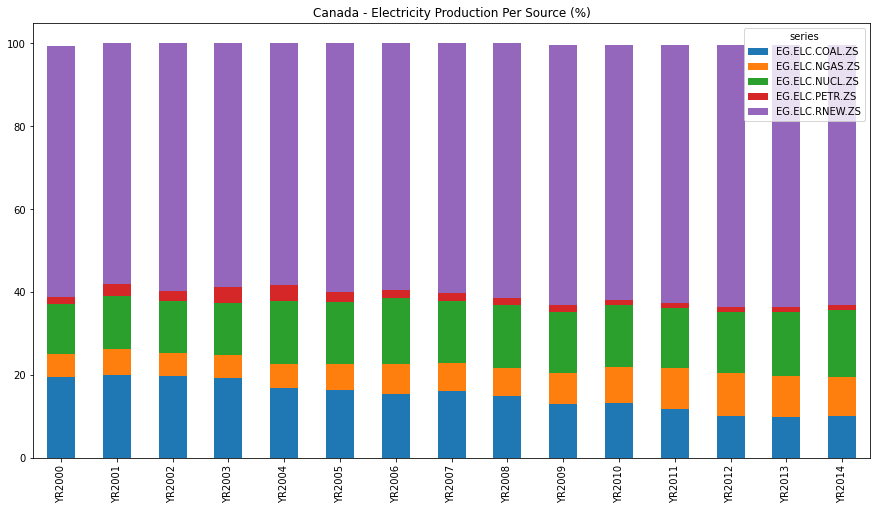

In [73]:
x = df.loc[ 'CAN' ]
ax=x.T.plot.bar( figsize=(15,8), stacked=True, title='Canada - Electricity Production Per Source (%)' )

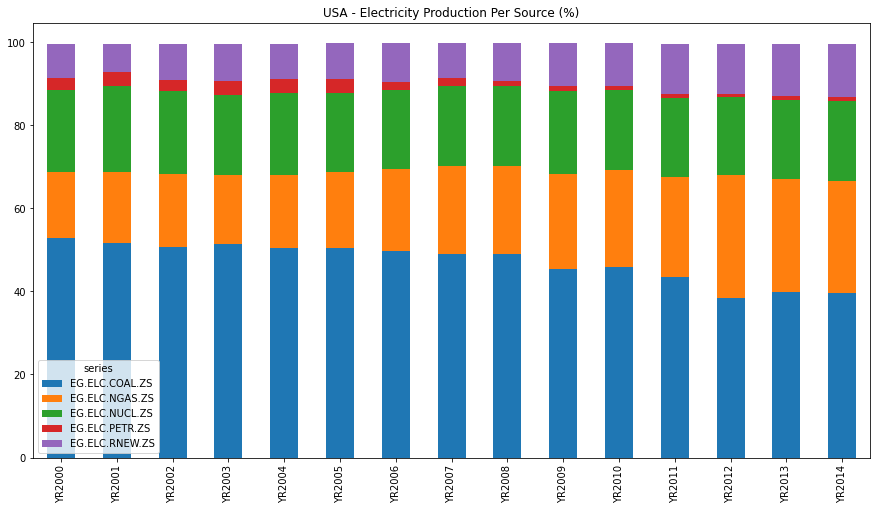

In [74]:
x = df.loc[ 'USA' ]
ax=x.T.plot.bar( figsize=(15,8), stacked=True, title='USA - Electricity Production Per Source (%)' )

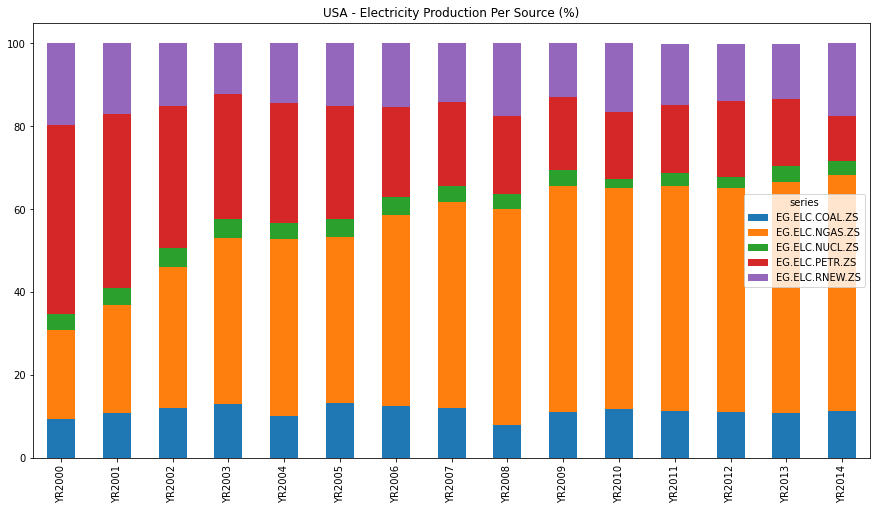

In [76]:
x = df.loc[ 'MEX' ]
ax=x.T.plot.bar( figsize=(15,8), stacked=True, title='USA - Electricity Production Per Source (%)' )

### _Largest impacts of deforestation_ 

In [82]:
wb.db=2
wb.search('deforestation')

ID,Name,Field,Value
AG.LND.FRST.K2,Forest area (sq. km),Developmentrelevance,"... the international community is increasingly focusing on conserving diversity. Deforestation is a major cause of loss of biodiversity, and habitat conservation is vital for..."
AG.LND.FRST.K2,Forest area (sq. km),Statisticalconceptandmethodology,"...countries, this indictor data does not reflect that breakdown. Thus the deforestation data may underestimate the rate at which natural forest is disappearing in some..."
AG.LND.FRST.ZS,Forest area (% of land area),Developmentrelevance,"... the international community is increasingly focusing on conserving diversity. Deforestation is a major cause of loss of biodiversity, and habitat conservation is vital for..."
EN.ATM.CO2E.EG.ZS,CO2 intensity (kg per kg of oil equivalent energy use),Limitationsandexceptions,"...fuels and cement manufacture, but excludes emissions from land use such as deforestation...."
EN.ATM.CO2E.GF.KT,CO2 emissions from gaseous fuel consumption (kt),Statisticalconceptandmethodology,"...fuels and cement manufacture, but excludes emissions from land use such as deforestation. Carbon dioxide emissions are often calculated and reported as elemental carbon..."
EN.ATM.CO2E.GF.ZS,CO2 emissions from gaseous fuel consumption (% of total),Statisticalconceptandmethodology,"...fuels and cement manufacture, but excludes emissions from land use such as deforestation. Carbon dioxide emissions are often calculated and reported as elemental carbon..."
EN.ATM.CO2E.KT,Total CO2 emissions (thousand metric tons of CO2 excluding Land-Use Change and Forestry),Statisticalconceptandmethodology,"...fuels and cement manufacture, but excludes emissions from land use such as deforestation. The unit of measurement is kt (kiloton). Carbon dioxide emissions are often..."
EN.ATM.CO2E.LF.KT,CO2 emissions from liquid fuel consumption (kt),Statisticalconceptandmethodology,"...fuels and cement manufacture, but excludes emissions from land use such as deforestation. Carbon dioxide emissions are often calculated and reported as elemental carbon..."
EN.ATM.CO2E.LF.ZS,CO2 emissions from liquid fuel consumption (% of total),Statisticalconceptandmethodology,"...fuels and cement manufacture, but excludes emissions from land use such as deforestation. Carbon dioxide emissions are often calculated and reported as elemental carbon..."
EN.ATM.CO2E.PC,CO2 emissions (metric tons per capita),Statisticalconceptandmethodology,"...fuels and cement manufacture, but excludes emissions from land use such as deforestation...."


In [94]:
# Forest area (% of land area)
df = wb.data.DataFrame( 'AG.LND.FRST.ZS', wb.region.members('WLD'), range(2000, 2019) )
df[ 'change' ] = df[ 'YR2018' ] - df[ 'YR2000' ]
df

,YR2000,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,YR2009,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,change
economy,,,,,,,,,,,,,,,,,,,,
ABW,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,0.000000
AFG,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,0.000000
AGO,62.331443,61.886219,61.440995,60.995770,60.550546,60.105322,59.660098,59.214874,58.769649,58.324425,57.879201,57.433976,56.988751,56.543526,56.098301,55.653076,55.207845,54.762629,54.317406,-8.014037
ALB,28.076642,28.123248,28.169854,28.216460,28.263066,28.309672,28.356277,28.402883,28.449489,28.496095,28.542701,28.594653,28.646606,28.698558,28.750511,28.802464,28.802190,28.792062,28.791971,0.715328
AND,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEM,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,0.000000
ZAF,14.655211,14.625205,14.595199,14.565193,14.535187,14.505181,14.475175,14.445169,14.415163,14.385157,14.355151,14.325145,14.295139,14.265133,14.235127,14.205121,14.175115,14.145109,14.115103,-0.540108


<AxesSubplot:title={'center':'Forest area (% of land area)'}>

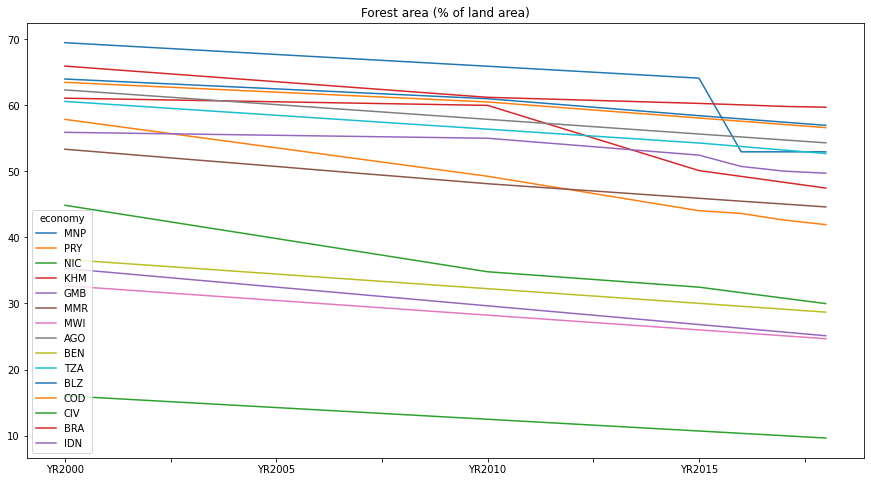

In [98]:
g15 = df.sort_values(by=['change'],ascending=True)[:15]
g15.drop('change', axis=1, inplace=True)
g15.T.plot(figsize=(15,8), title='Forest area (% of land area)')